# Digits Recognization with non-linear SVMs

## Import nescessary Libraries

In [29]:
# Enable interactive plotting in Jupyter Notebook
%matplotlib widget

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


# Data preparation

In [30]:
# Load the train and test datasets
df_train = pd.read_csv('Datasets/train.csv')
df_test = pd.read_csv('Datasets/test.csv')

# Spliting train data into X_train, Y_train
Y_train = df_train.iloc[:, 0] # First column contains lables (classses)
X_train = df_train.iloc[:, 1:] # Next 784 columns are pixel with 28x28 pixel (square)

# Convert Pandas DataFrames to NumPy arrays
X_train_np = X_train.to_numpy()
Y_train_np = Y_train.to_numpy()

# Normalize data
X_train_np = X_train_np / 255.0

print(X_train_np.shape)  # Check the shape of X_train_n

(42000, 784)


In [31]:
# Show out lable
Y_train.head()
# Assuming Y_train is your array of labels
num_labels = len(Y_train)
print("Number of labels in Y_train:", num_labels)

# Create a boolean mask indicating where null values are
null_mask = X_train.isnull()

# Sum the True values in the mask to count the total null values column-wise
null_values_per_column = null_mask.sum()

# Sum the total null values across all columns
total_null = null_values_per_column.sum()

print("Total null values in the DataFrame:", total_null)

Number of labels in Y_train: 42000
Total null values in the DataFrame: 0


# Split data into two cases:

    X_train_23 and Y_train_23 with 2 labels, specifically digits 2 and 3,
    X_train and Y_train with all labels, encompassing digits from 0 to 9.

In [32]:
# PCA for all data
pca_all = PCA(n_components=3)
X_train_pca = pca_all.fit_transform(X_train_np)

# Split data into X_train_23, Y_train_23 with labels 2 and 3
X_train_23 = X_train_np[(Y_train_np == 2) | (Y_train_np == 3)]
Y_train_23 = Y_train_np[(Y_train_np == 2) | (Y_train_np == 3)]

# PCA for subset with labels 2 and 3
pca_23 = PCA(n_components=3)
X_train_23_pca = pca_23.fit_transform(X_train_23)



## Visual 2 cases

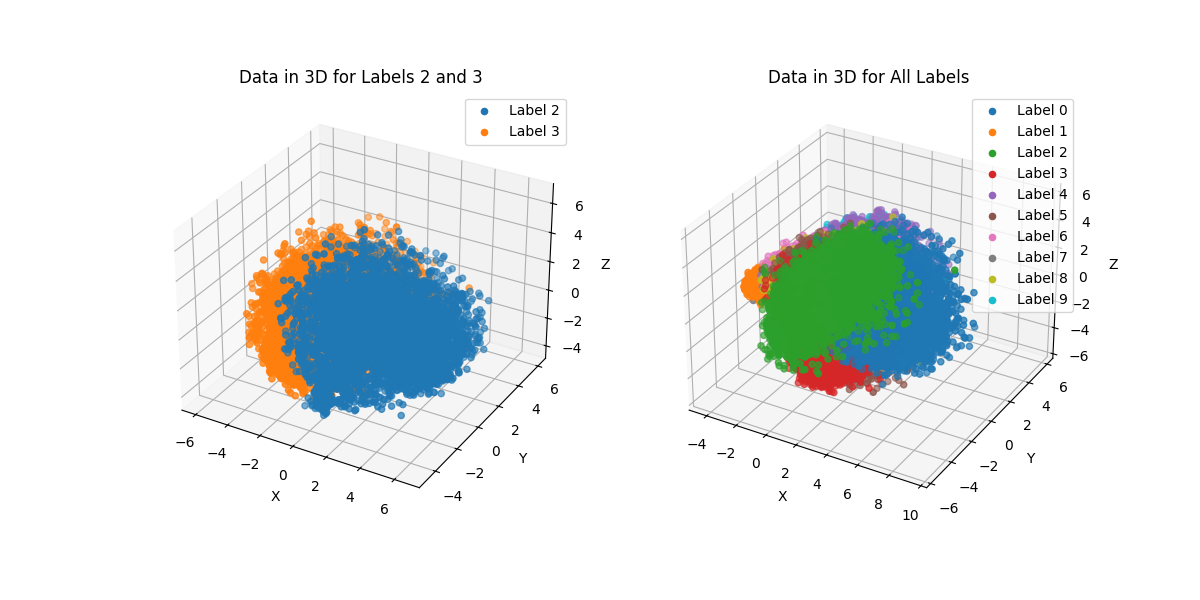

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Function to display a Matplotlib figure in a widget
def display_figure(fig):
    # Convert Matplotlib figure to a widget
    canvas = widgets.Output()
    with canvas:
        display(fig)
    
    # Display the widget
    display(canvas)

# Plot in 3D for X_train_23 and Y_train_23
fig = plt.figure(figsize=(12, 6))

# Subplot 1: Data in 3D for Labels 2 and 3
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('Data in 3D for Labels 2 and 3')


# Plot points with labels 2 and 3
for label in np.unique(Y_train_23):
    ax1.scatter(X_train_23_pca[Y_train_23 == label, 0],
                X_train_23_pca[Y_train_23 == label, 1],
                X_train_23_pca[Y_train_23 == label, 2],
                label=f'Label {label}')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()

# Subplot 2: Data in 3D for All Labels
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title('Data in 3D for All Labels')



# Plot points with all labels
for label in np.unique(Y_train):
    ax2.scatter(X_train_pca[Y_train == label, 0],
                X_train_pca[Y_train == label, 1],
                X_train_pca[Y_train == label, 2],
                label=f'Label {label}')

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()

# Show the plot
plt.show()


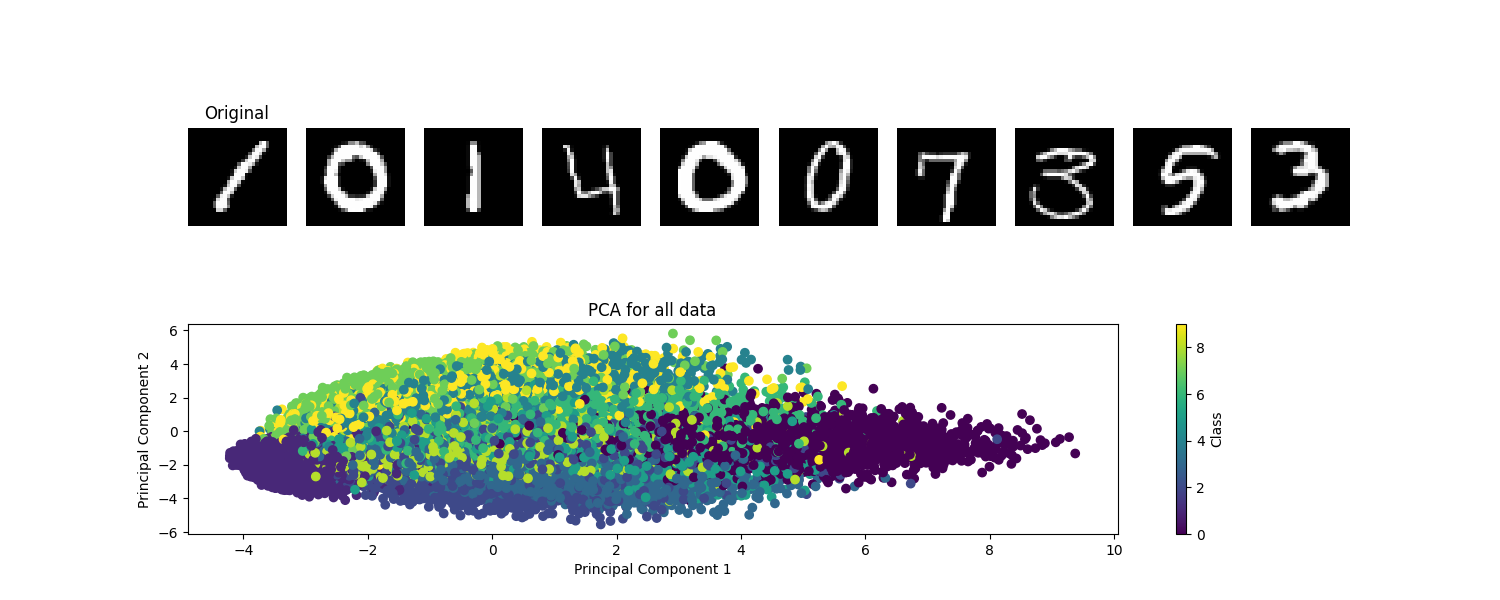

In [34]:
import matplotlib.pyplot as plt

# Visualize original images
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_train_np[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Original')
        
# Visualize PCA for all data
plt.subplot(2, 1, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train_np, cmap='viridis')
plt.title('PCA for all data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()


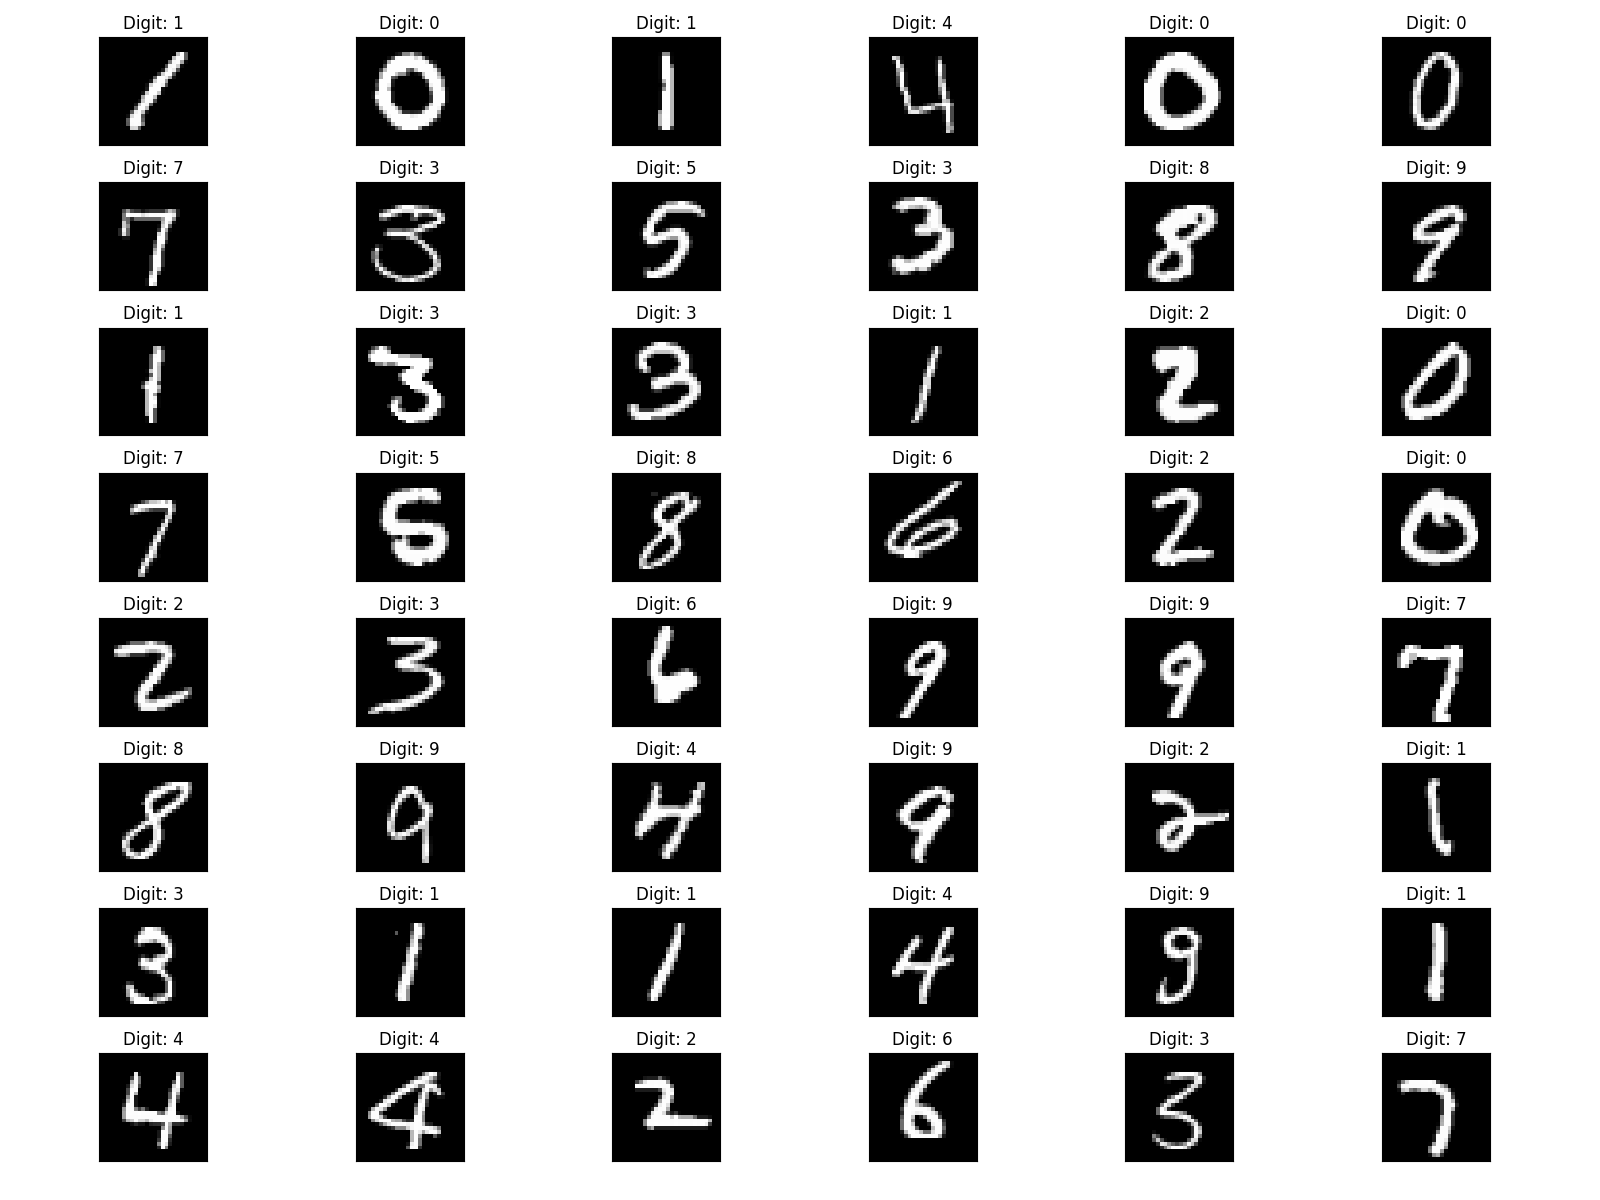

No such comm: d64e1351d7c24d9aad838f0d181c6bb2
No such comm: d64e1351d7c24d9aad838f0d181c6bb2
No such comm: d64e1351d7c24d9aad838f0d181c6bb2


In [35]:
def plot_digits(X, Y):
    # Close all existing figures
    plt.close('all')
    X_array = X.values if isinstance(X, pd.DataFrame) else X
    Y_array = Y.values if isinstance(Y, pd.Series) else Y
    
    # Create a new figure
    plt.figure(figsize=(16, 12))
    
    for i in range(48):
        plt.subplot(8, 6, i+1)
        plt.tight_layout()
        plt.imshow(X_array[i].reshape(28, 28), cmap='gray')
        plt.title('Digit: {}'.format(Y_array[i]))
        plt.xticks([])
        plt.yticks([])
    
    plt.show()

# Now call the function with X_train and Y_train
plot_digits(X_train, Y_train)


# Approach: Find hyperplane between two labels.

## Find Hyperplane between digit 2 and digit 3

## Using library

Accuracy: 0.9386726078799249


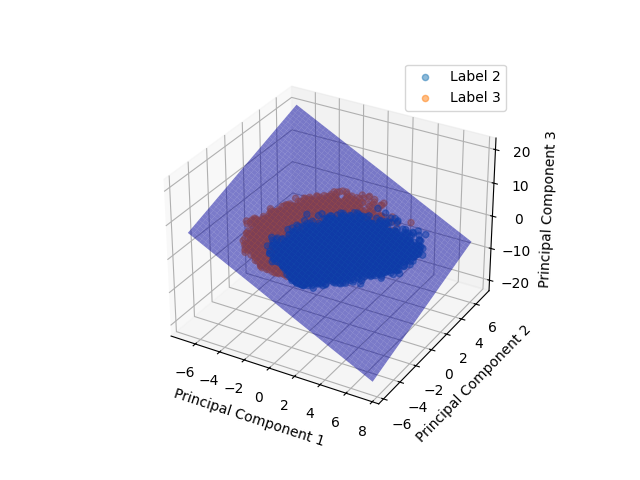

No such comm: e37b2b8ccc9a4152ab455f75e3a9bcdb


No such comm: 4d4bcea44d924457a69c22068d5aa9c5


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

# Fit SVM to separate data points with labels 2 and 3
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train_23_pca, Y_train_23)

# Create meshgrid for plotting the hyperplane
x_min, x_max = X_train_23_pca[:, 0].min() - 1, X_train_23_pca[:, 0].max() + 1
y_min, y_max = X_train_23_pca[:, 1].min() - 1, X_train_23_pca[:, 1].max() + 1
z_min, z_max = X_train_23_pca[:, 2].min() - 1, X_train_23_pca[:, 2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
zz = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0][0] * xx - svm_classifier.coef_[0][1] * yy) / svm_classifier.coef_[0][2]

# Evaluate and print accuracy
accuracy = svm_classifier.score(X_train_23_pca, Y_train_23)
print("Accuracy:", accuracy)

# Plot the data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points with label 2
ax.scatter(X_train_23_pca[Y_train_23 == 2, 0],
           X_train_23_pca[Y_train_23 == 2, 1],
           X_train_23_pca[Y_train_23 == 2, 2],
           label='Label 2',
           alpha=0.5)

# Plot data points with label 3
ax.scatter(X_train_23_pca[Y_train_23 == 3, 0],
           X_train_23_pca[Y_train_23 == 3, 1],
           X_train_23_pca[Y_train_23 == 3, 2],
           label='Label 3',
           alpha=0.5)

# Plot hyperplane
ax.plot_surface(xx, yy, zz, color='b', alpha=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()




---

## Manual coding

SVM in a cassificaiton problem, the goal is to draw a hyperplane that separate the data points into distinct categories.


### Support Vector Machines (SVM) Mathematics

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. In classification, SVM finds the hyperplane that best separates the classes in the feature space. Here's a brief overview of the mathematics behind SVM:

1. **Objective**:
   The main objective of SVM is to find the optimal hyperplane that maximally separates the data points of different classes while maximizing the margin.

2. **Decision Function**:
   The decision function for SVM is defined as:
   $$ f(x) = w^T x + b $$
   where:
   - $ f(x) $ is the decision function.
   - $ x $ represents the input features.
   - $ w $ is the weight vector.
   - $ b $ is the bias term.

3. **Optimization**:
   SVM solves the optimization problem of finding the optimal hyperplane by maximizing the margin. This is typically formulated as a constrained optimization problem. The objective function to be maximized is:
   $$ \max_{w,b} \frac{1}{\|w\|} $$
   subject to:
   $ y_i(w^T x_i + b) \geq 1 $ for all $ i = 1, 2, \ldots, n $
   where:
   - $ (x_i, y_i) $ are the training data points and labels.
   - $ y_i $ is the class label of $ x_i $.
   - $ \|w\| $ is the Euclidean norm of the weight vector.

4. **Support Vectors**:
   The data points that lie closest to the hyperplane are called support vectors. These are the data points that have non-zero coefficients in the optimization problem and determine the position of the hyperplane.

5. **Kernel Trick**:
   - If we change our perspective to view the hidden value. In the case of nonlinear classification, we simply increase the dimensionality of the data using a new function. $$ \mathbb{R} \rightarrow \mathbb{R}^2 $$
   - SVM can be extended to handle non-linear decision boundaries by using the kernel trick. Instead of computing the dot product of input features directly, SVM computes the dot product in a higher-dimensional feature space using a kernel function, such as the radial basis function (RBF) kernel or polynomial kernel.
   - The polynomial kernel function, difined as: $$ K(x, y) = (x \cdot y + c)^d $$


6. **Soft Margin SVM**:
   In cases where the data is not linearly separable, SVM allows for the introduction of slack variables to allow some misclassifications. This is known as soft margin SVM, which introduces a penalty term for misclassified data points.
   
   The Hinge Loss-hyperplane function is used in Support Vector Machines (SVMs) for defining the decision boundary. It is represented as: $$w.x + b = 0$$

      Where:
      - **w**: Weight vector
      - **x**: Input vector
      - **b**: Bias term

      The function ensures that the support vectors satisfy the following conditions:
      - For positive class samples:  $w.x^(i) ≥ +1$
      - For negative class samples:  $w.x^(i) ≤ -1$

      The maximum margin is defined as:


These are the key mathematical concepts behind Support Vector Machines. Understanding these principles can help in effectively using SVM for classification tasks.



In [ ]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


In [ ]:
# Initialize an instance of your SVM class
svm_model = SVM()

# Convert labels to -1 and 1
Y_train_23 = np.where(Y_train_23 == 2, -1, 1)
Y_train_23 = np.where(Y_train_23 == 3, 1, Y_train_23)

# Fit the SVM model to your training data
svm_model.fit(X_train_23_pca, Y_train_23)

# Use the trained SVM model to predict labels for your data
predicted_labels = svm_model.predict(X_train_23_pca)

# Print the predicted labels
print(predicted_labels)


# Calculate accuracy
accuracy = np.mean(predicted_labels == Y_train_23)
print("Accuracy:", accuracy)


[ 1.  1.  1. ... -1.  1.  1.]
Accuracy: 0.9383208255159474


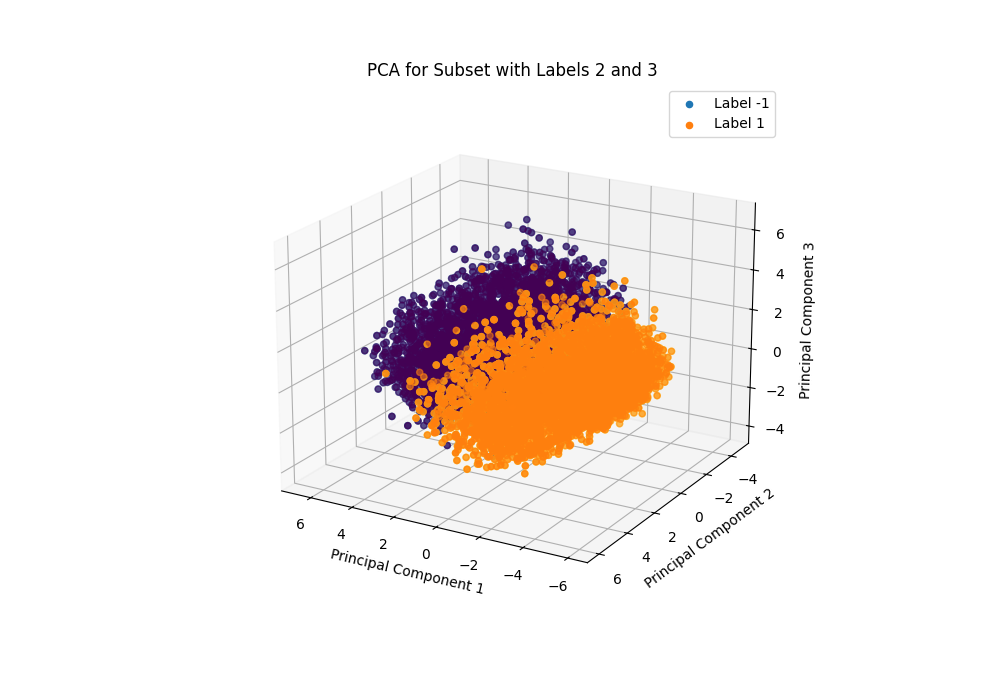

In [ ]:
# Get the coefficients of the hyperplane
coefficients = svm_model.w, svm_model.b

# Visualize PCA for subset with labels 2 and 3
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(111, projection='3d')

# Plot points from PCA
ax1.scatter(X_train_23_pca[:, 0], X_train_23_pca[:, 1], X_train_23_pca[:, 2], c=Y_train_23)

# Plot points with labels 2 and 3
for label in np.unique(Y_train_23):
    ax1.scatter(X_train_23_pca[Y_train_23 == label, 0],
                X_train_23_pca[Y_train_23 == label, 1],
                X_train_23_pca[Y_train_23 == label, 2],
                label=f'Label {label}')

# Plot hyperplane
x_min, x_max = ax1.get_xlim()
y_min, y_max = ax1.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
zz = (-coefficients[0][0] * xx - coefficients[0][1] * yy - coefficients[1]) / coefficients[0][2]
ax1.plot_surface(xx, yy, zz, alpha=0.5, color='gray')

ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')
ax1.legend()

ax1.view_init(elev=20, azim=120)  # Adjust the view angle for better visualization

plt.title('PCA for Subset with Labels 2 and 3 with SVM Hyperplane')
plt.show()


In [ ]:
# Assuming you have already imported necessary libraries and defined SVM class

# Initialize an instance of your SVM class
svm_model = SVM()

# Convert labels to -1 and 1
Y_train_23 = np.where(Y_train_23 == 2, -1, 1)
Y_train_23 = np.where(Y_train_23 == 3, 1, Y_train_23)

# Fit the SVM model to your training data
svm_model.fit(X_train_23_pca, Y_train_23)

# Use the trained SVM model to predict labels for your training data
predicted_labels_train = svm_model.predict(X_train_23_pca)

# Print the predicted labels for training data
print("Predicted Labels (Training Data):", predicted_labels_train)

# Calculate accuracy on training data
accuracy_train = np.mean(predicted_labels_train == Y_train_23)
print("Accuracy on Training Data:", accuracy_train)

# Assuming X_test contains the test data features
# Transform test data using the same PCA transformation applied to the training data
X_test = df_test.values
pca_test = PCA(n_components=3)
X_test_pca = pca_test.fit_transform(X_test)

# Use the trained SVM model to predict labels for the test data
predicted_labels_test = svm_model.predict(X_test_pca)

# Print the predicted labels for test data
print("Predicted Labels (Test Data):", predicted_labels_test)

# If you have ground truth labels for test data, you can calculate accuracy
# For example, assuming you have ground truth labels for test data in Y_test
# Convert labels to -1 and 1 for test data if needed
# Y_test = np.where(Y_test == 2, -1, 1)
# Y_test = np.where(Y_test == 3, 1, Y_test)

# Calculate accuracy on test data
# accuracy_test = np.mean(predicted_labels_test == Y_test)
# print("Accuracy on Test Data:", accuracy_test)


Predicted Labels (Training Data): [1. 1. 1. ... 1. 1. 1.]
Accuracy on Training Data: 1.0
Predicted Labels (Test Data): [1. 1. 1. ... 1. 1. 1.]


---

# Approach: Classifying 10 labels with SVMs.

## One Vs One (OvO) method

In [ ]:
class DCSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.models = {}  # Dictionary to store individual SVM models for each class

    def fit(self, X_train, y_train):
        # Train one binary SVM per class
        for class_label in np.unique(y_train):
            svm_model = SVM(self.learning_rate, self.lambda_param, self.n_iters)
            y_binary = np.where(y_train == class_label, 1, -1)  # 1 for the current class, -1 for others
            svm_model.fit(X_train, y_binary)
            self.models[class_label] = svm_model

    def predict(self, X_test):
        # Predict using all binary SVM models and select the class with the highest confidence score
        predictions = []
        for sample in X_test:
            class_scores = {label: model.predict(sample.reshape(1, -1)) for label, model in self.models.items()}
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return np.array(predictions)


In [ ]:
# Assuming you have X_train_pca and Y_train already defined

# Initialize DCSVM model
dcsvm_model = DCSVM()

# Fit DCSVM model
dcsvm_model.fit(X_train_pca, Y_train)

# Predict labels for test data
y_pred = dcsvm_model.predict(X_train_pca)

# Evaluate accuracy
accuracy = np.mean(y_pred == Y_train)
print("Accuracy:", accuracy)


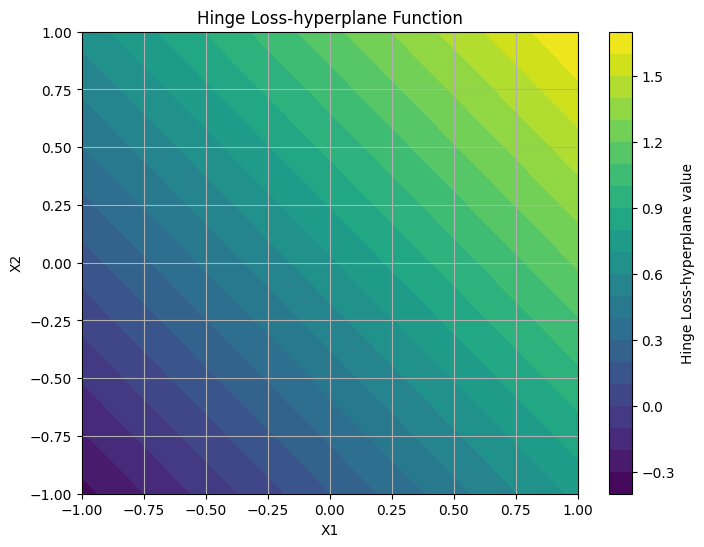

In [ ]:


def hinge_loss_hyperplane(w, x, b):
    """
    Compute the Hinge Loss-hyperplane function.
    
    Args:
    - w (numpy.ndarray): Weight vector
    - x (numpy.ndarray): Input vector
    - b (float): Bias term
    
    Returns:
    - float: Result of w.x + b
    """
    return np.dot(w, x) + b

# Generate random weight vector and bias term
w = np.random.rand(2)
b = np.random.rand(1)

# Generate random input vectors
x_values = np.linspace(-1, 1, 100)
y_values = np.linspace(-1, 1, 100)

# Compute Hinge Loss-hyperplane values for each input vector
hinge_values = []
for y in y_values:
    for x in x_values:
        hinge_values.append(hinge_loss_hyperplane(w, np.array([x, y]), b))

# Reshape the hinge values to match the grid of input vectors
hinge_values = np.array(hinge_values).reshape(len(y_values), len(x_values))

# Plot the Hinge Loss-hyperplane function
plt.figure(figsize=(8, 6))
plt.contourf(x_values, y_values, hinge_values, levels=20, cmap='viridis')
plt.colorbar(label='Hinge Loss-hyperplane value')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Hinge Loss-hyperplane Function')
plt.grid(True)
plt.show()
